# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset=pd.read_csv('car_purchase_data.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state =40)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

## Training the K-NN model on the Training set

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [6]:
age = input("Enter the age of the person: ")
salary = input("Enter the salary of the person: ")

Age = float(age)
Salary = float(salary)

print(Age, Salary)
print(knn.predict(sc.transform([[Age, Salary]])))

Enter the age of the person: 40
Enter the salary of the person: 30000
40.0 30000.0
[0]


## Predicting the Test set results

In [7]:
y_pred = knn.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))


[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[53  3]
 [ 3 21]]
0.925


## Visualising the Training set results

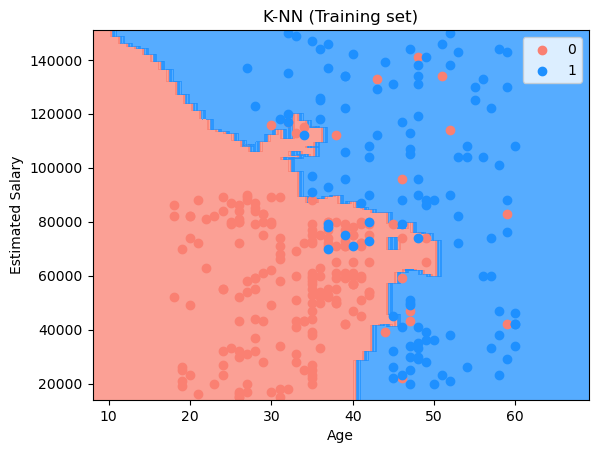

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



x_set, y_set = sc.inverse_transform(x_train), y_train

# Increase the step size to reduce the number of points in the meshgrid
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=1),
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=1))

plt.contourf(x1, x2, knn.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



## Visualising the Test set results

In [10]:

x_set, y_set = sc.inverse_transform(x_test),y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.25))

plt.contourf(x1, x2, knn.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('salmon', 'dodgerblue'))(i), label=j)

plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 5.03 GiB for an array with shape (134912000, 5) and data type float64